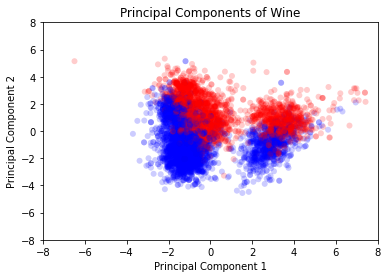

[428, 2192, 714, 6299, 3336, 2183, 882, 312, 3105, 4392]

<Figure size 432x288 with 0 Axes>

In [1]:
import pandas as pd
data = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@wine.csv",
                  index_col=0)
data


data["is_red"] = (data["color"] == "red").astype(int)
numeric_data = data.drop("color", axis=1)

numeric_data.groupby('is_red').count()


import sklearn.preprocessing
scaled_data = sklearn.preprocessing.scale(numeric_data)
numeric_data = pd.DataFrame(scaled_data, columns = numeric_data.columns)

import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data)

principal_components.shape

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages
observation_colormap = ListedColormap(['red', 'blue'])
x = principal_components[:,0]
y = principal_components[:,1]

plt.title("Principal Components of Wine")
plt.scatter(x, y, alpha = 0.2,
    c = data['high_quality'], cmap = observation_colormap, edgecolors = 'none')
plt.xlim(-8, 8); plt.ylim(-8, 8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
plt.savefig("principal components of wine.pdf")

import numpy as np 
np.random.seed(1) # do not change this!

x = np.random.randint(0, 2, 1000)
y = np.random.randint(0 ,2, 1000)

def accuracy(predictions, outcomes):
    return 100 * np.sum(predictions == outcomes) / len(outcomes)

accuracy(x, y)


number_of_low_quality = accuracy(0, data["high_quality"])
number_of_low_quality


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(numeric_data, data['high_quality'])
library_predictions = knn.predict(numeric_data)
predictions_accuracy = accuracy(library_predictions, data["high_quality"])
predictions_accuracy


import random 

n_rows = data.shape[0]

random.seed(123)
selection = random.sample(range(n_rows), 10)
selection